In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from play import play_a_game_auto

In [2]:
gamma = 0.9  # discount rate
total_episodes_calc_return = 100
total_times_for_return = 3000
total_episodes = total_times_for_return + total_episodes_calc_return
total_samples = 500
np.random.seed(123456)
Path("./data").mkdir(exist_ok=True)

print("Should be smaller than 1e-4:", gamma ** total_episodes_calc_return)

Should be smaller than 1e-4: 2.6561398887587544e-05


In [3]:
def discounted_cumulative_reward(rewards):
    c = np.zeros(total_times_for_return)
    for t in range(total_times_for_return):
        c[t] = np.sum([(gamma**k) * rewards[t + k] for k in range(total_episodes_calc_return)])
    return c

## 常に0番目の行動を選ぶエージェント

In [4]:
datafile = "./data/default_0.txt"
p_datafile = Path(datafile)
data_exist = p_datafile.exists() and p_datafile.is_file()
if data_exist:
    avg_retrun_default = np.loadtxt(datafile)
    data_exist = avg_retrun_default.size == total_times_for_return
if not data_exist:
    avg_retrun_default = np.zeros(total_times_for_return)
    for _ in range(total_samples):
        avg_retrun_default += discounted_cumulative_reward(play_a_game_auto(total_episodes=total_episodes))
    avg_retrun_default /= total_samples
    np.savetxt(datafile, avg_retrun_default, fmt='%.4f')

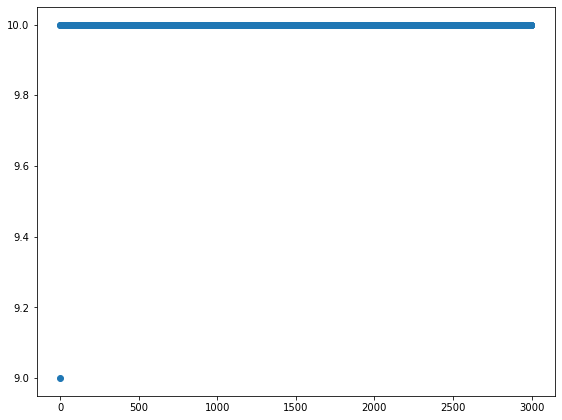

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.subplots(1, 1)
fig.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1)

ax.scatter(range(len(avg_retrun_default)), avg_retrun_default)

## SARSA法で学習するエージェント
### policyの更新はイプシロン貪欲法で、Q関数はゼロ初期化

In [12]:
datafile = "./data/SARSA_ep_zero.txt"
p_datafile = Path(datafile)
data_exist = p_datafile.exists() and p_datafile.is_file()
if data_exist:
    avg_return_SARSA_ep_zero = np.loadtxt(datafile)
    data_exist = avg_return_SARSA_ep_zero.size == total_times_for_return
if not data_exist:
    from SARSA import AgentSARSA
    from policy_models import epsilon_greedy

    avg_return_SARSA_ep_zero = np.zeros(total_times_for_return)
    for _ in range(total_samples):
        agent = AgentSARSA(gamma=gamma, policy_model=epsilon_greedy, optimistic=False)
        avg_return_SARSA_ep_zero += discounted_cumulative_reward(play_a_game_auto(total_episodes=total_episodes, agent=agent))
    avg_return_SARSA_ep_zero /= total_samples
    np.savetxt(datafile, avg_return_SARSA_ep_zero, fmt='%.4f')

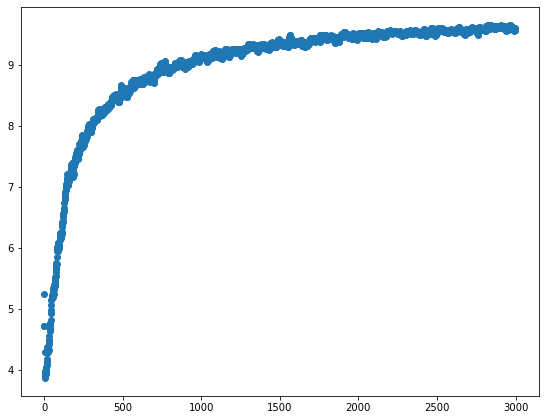

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.subplots(1, 1)
fig.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1)

ax.scatter(range(len(avg_return_SARSA_ep_zero)), avg_return_SARSA_ep_zero)